# Data Wrangling Project - Case WeRateDogs

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing, Analyzing, and Visualizing Data</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>


<a id='intro'></a>
## Introduction

In this project, we will wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations, through Data Wrangling steps (Gather, Assess, and Clean).

<a id='gathering'></a>
## Gathering Data

In this step, we will gather some data in different resources.

- **Enhanced Twitter Archive**: file downloaded in this link: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv. This dataset has the following informations: rating, dog name, and dog stage.

- **Additional Data via the Twitter API**: The tweets where are stored in the previous data set have some missing informations, such as retweet count and favorite count. To gather these informations, we will use the Twitter API, and search through the tweet_id (first column of "Enhanced Twitter Archive" dataset).

- **Image Predictions File**: file downloaded in this link: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv. This dataset has the following informations: image predictions, tweet id, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).


### 1. Enhanced Twitter Archive

In [7]:
#import all necessary packages
import numpy as np
import pandas as pd
import os
import requests
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#load csv
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Additional Data via the Twitter API

Reference: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [4]:
#Get data from Twitter API
import tweepy

consumer_key = 'CONSUMER_KEY'
consumer_secret = 'CONSUMER_SECRET'
access_token = 'ACESS_TOKEN'
access_secret = 'ACESS_SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
#Get json data
tweets_metrics = []
not_tweets_metrics = []
with open('tweet_json.txt', 'w') as output:
    for tweet_id in df_tweets['tweet_id']:   
        try:
            tweet=api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        
        except tweepy.TweepError:
            not_tweets_metrics.append(tweet_id)
print(len(not_tweets_metrics))

In [ ]:
#Tranform json file to dataframe
tweetlist = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweetlist.append(tweets_dict)

In [ ]:
tweets_fav_rt_df = pd.DataFrame(tweetlist)

In [ ]:
tweets_fav_rt_df.head()

In [ ]:
#export twitter data to csv
tweets_fav_rt_df.to_csv('tweets_fav_rt_df.csv', index=False)

### 3. Image Predictions File

In [3]:
#Download programmatically using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(url)
open('image_predictions.tsv', 'wb').write(req.content)

df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='assessing'></a>
## Assessing Data

For assessing data, we will analyze it in two ways: first visual, and then, programmatic.

First, we will see all dataframes.

In [4]:
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
tweets_fav_rt_df = pd.read_csv('tweets_fav_rt_df.csv')
tweets_fav_rt_df.head()

,favorite_count,retweet_count,tweet_id
0,35100,7388,892420643555336193
1,30383,5504,892177421306343426
2,22846,3636,891815181378084864
3,38374,7564,891689557279858688
4,36643,8148,891327558926688256


In [6]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Visual Assessment

- In the Enhanced Twitter Archive dataframe, the column "timestamp" the write can be writing in the better way.
- In the Enhanced Twitter Archive dataframe, the column "source" can be more readable.
- Columns headers should be more descriptive.

### Programmatic Assessment

Analyzing the datatypes

In [8]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In the colummns "doggo", "floofler", "pupper", and "puppo", the "None" is treated as a non-null value.

In [9]:
tweets_fav_rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [10]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_tweets['expanded_urls'].duplicated().sum()

137

In [12]:
df_tweets['expanded_urls'].isnull().sum()

59

In [13]:
#duplicates + missing values
df_tweets['expanded_urls'].duplicated().sum() + df_tweets['expanded_urls'].isnull().sum()

196

- Column "expanded_urls" in Enhanced Twitter Archive dataframe has missing values and duplicates.

#### Enhanced Twitter Archive

- Column tweet_id as int64
- Column reply_to_status_id has missing values
- Column in_reply_to_user_id has missing values
- Column timestamp as object
- Column retweeted_status_id as float64
- Column retweeted_status_user_id as float64
- Column retweeted_status_timestamp as object
- Column expanded_urls has missing values and duplicates

In [15]:
df_tweets.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Tidiness problems

- The columns "doggo", "floofer", "pupper", and "puppo" can be one columns.
- The "tweets_fav_rt_df" is related with "df_tweets".

To sum up, the problems are divided by the quality and tidy problems.

#### Quality
- Column tweet_id as int64
- Column timestamp as object
- In the Enhanced Twitter Archive dataframe, the column "timestamp" the write can be writing in the better way
- Column reply_to_status_id has missing values
- Column in_reply_to_user_id has missing values
- Column retweeted_status_id as float64 and has missing values
- Column retweeted_status_user_id as float64 and has missing values
- Column retweeted_status_timestamp as object and has missing values
- Column expanded_urls has missing values and duplicates
- In the Enhanced Twitter Archive dataframe, the column "source" can be more readable.
- Columns headers should be more descriptive.
- In the colummns "doggo", "floofler", "pupper", and "puppo", the "None" is treated as a non-null value.
- We only want original dog ratings.

#### Tidy
- The columns "doggo", "floofer", "pupper", and "puppo" can be one columns
- The "tweets_fav_rt_df" is related to "df_tweets"


<a id='cleaning'></a>
## Data Cleaning


In [14]:
df_tweets_archive_clean = df_tweets.copy()
tweets_fav_rt_df_clean = tweets_fav_rt_df.copy()
df_image_predictions_clean = df_image_predictions.copy()

#### Define
1. Remove retweets as we want original dogs ratings

#### Code

In [16]:
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean.retweeted_status_id.isnull()]
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean.retweeted_status_user_id.isnull()]
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [17]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define
1. Remove html tags from source to make it more readable

#### Code

In [18]:
#https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string
#Function to remove html tags
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [21]:
#applying into dataframe
for index, row in df_tweets_archive_clean.iterrows():
    df_tweets_archive_clean.loc[index, 'source'] = cleanhtml(row['source'])

#### Test

In [22]:
df_tweets_archive_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define
1. Convert "None" in the columns "doggo", "floofler", "pupper", and "puppo" to null.

#### Code

In [25]:
df_tweets_archive_clean['doggo'] = df_tweets_archive_clean['doggo'].replace('None', np.nan)
df_tweets_archive_clean['floofer'] = df_tweets_archive_clean['floofer'].replace('None', np.nan)
df_tweets_archive_clean['pupper'] = df_tweets_archive_clean['pupper'].replace('None', np.nan)
df_tweets_archive_clean['puppo'] = df_tweets_archive_clean['puppo'].replace('None', np.nan)

#### Test

In [26]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: float64(4), int64(3), object(10)
memo

#### Define
1. Change columns names to be more readable

#### Code

In [30]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
name_list = list(df_image_predictions_clean.columns)
name_list

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [33]:
df_image_predictions_clean.columns = ['tweet_id',
 'jpg_url',
 'Number of Images',
 'First Prediction',
 'Confidence of First Prediction',
 'First prediction is a breed of dog',
 'Second Prediction',
 'Confidence of Second Prediction',
 'Second prediction is a breed of dog',
 'Third Prediction',
 'Confidence of Third Prediction',
 'Third prediction is a breed of dog']

#### Test

In [34]:
df_image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'Number of Images', 'First Prediction',
       'Confidence of First Prediction', 'First prediction is a breed of dog',
       'Second Prediction', 'Confidence of Second Prediction',
       'Second prediction is a breed of dog', 'Third Prediction',
       'Confidence of Third Prediction', 'Third prediction is a breed of dog'],
      dtype='object')

#### Define
1. Change tweet_id datatype to object

#### Code

In [35]:
df_tweets_archive_clean.tweet_id = df_tweets_archive_clean.tweet_id.astype(object)

#### Test

In [36]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: float64(4), int64(2), object(11)
mem

#### Define
1. Change the column timestamp to datetime
2. Change the format to YYYY-mm-dd

#### Code

In [37]:
df_tweets_archive_clean.timestamp = pd.to_datetime(df_tweets_archive_clean.timestamp)

In [38]:
df_tweets_archive_clean.timestamp = df_tweets_archive_clean.timestamp.dt.strftime('%Y/%m/%d')

In [39]:
df_tweets_archive_clean.timestamp = pd.to_datetime(df_tweets_archive_clean.timestamp)

#### Test

In [40]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](1), float64(4

In [41]:
df_tweets_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


#### Define
1. Columns "reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" has missing values, so we have to drop these columns.

#### Code

In [42]:
df_tweets_archive_clean = df_tweets_archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [43]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 300.9+ KB


#### Define
1. Drop missing values of column "expanded_urls".
2. Drop duplicates values of column "expanded_urls"

#### Code

In [44]:
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['expanded_urls'])

In [45]:
df_tweets_archive_clean = df_tweets_archive_clean.drop_duplicates(subset=['expanded_urls'])

#### Test

In [46]:
df_tweets_archive_clean['expanded_urls'].isnull().sum()

0

In [47]:
df_tweets_archive_clean['expanded_urls'].duplicated().sum()

0

#### Define

1. Merge the columns "doggo", "floofer", "pupper", and "puppo" into one column
2. Convert data type to categorical

#### Code

In [48]:
dog_list = ['doggo', 'floofer', 'pupper', 'puppo']

In [49]:
# append list in cells of column 'dog_type' with values from other columns
def d_type(archive_clean):    
    for i in range(archive_clean.shape[0]):
        for x in dog_list:
            if x in archive_clean.loc[i,['doggo', 'floofer', 'pupper', 'puppo']].tolist():
                archive_clean.loc[i,'dog_type'].append(x)
            else:
                continue   
        # convert list into string
        archive_clean.loc[i,'dog_type'] = ", ".join(archive_clean.loc[i,'dog_type'])
    # replace empty strings with another string
    archive_clean.dog_type = archive_clean.dog_type.replace('',np.nan)

In [50]:
df_tweets_archive_clean['dog_type'] = pd.np.empty((df_tweets_archive_clean.shape[0], 0)).tolist()

In [51]:
df_tweets_archive_clean.shape

(2116, 13)

In [52]:

df_tweets_archive_clean.reset_index(drop = True, inplace = True)

In [53]:
d_type(df_tweets_archive_clean)

In [54]:
df_tweets_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN


In [55]:
df_tweets_archive_clean['dog_type']=df_tweets_archive_clean['dog_type'].astype('category')

In [56]:
#Drop columns 'doggo', 'floofer', 'pupper', and 'puppo'
df_tweets_archive_clean=df_tweets_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [57]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 9 columns):
tweet_id              2116 non-null object
timestamp             2116 non-null datetime64[ns]
source                2116 non-null object
text                  2116 non-null object
expanded_urls         2116 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
name                  2116 non-null object
dog_type              338 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 134.8+ KB


In [58]:
df_tweets_archive_clean.dog_type.value_counts()

pupper            222
doggo              72
puppo              23
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

#### Define

1. Merge columns "favorite_count" and "retweet_count" of tweets_fav_rt_df_clean to df_tweets_archive_clean

#### Code

In [59]:
tweets_fav_rt_df_clean.tweet_id = tweets_fav_rt_df_clean.tweet_id.astype('object')

In [60]:
tweets_fav_rt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null object
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [61]:
df_tweets_archive_clean = df_tweets_archive_clean.merge(tweets_fav_rt_df_clean, how = 'left', on = 'tweet_id')

In [62]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 11 columns):
tweet_id              2116 non-null object
timestamp             2116 non-null datetime64[ns]
source                2116 non-null object
text                  2116 non-null object
expanded_urls         2116 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
name                  2116 non-null object
dog_type              338 non-null category
favorite_count        2109 non-null float64
retweet_count         2109 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 184.3+ KB


In [63]:
df_tweets_archive_clean['favorite_count'].isnull().sum()

7

In [64]:
df_tweets_archive_clean['retweet_count'].isnull().sum()

7

In [65]:
#Remove missing values
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['favorite_count'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['retweet_count'])

#### Test

In [66]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2115
Data columns (total 11 columns):
tweet_id              2109 non-null object
timestamp             2109 non-null datetime64[ns]
source                2109 non-null object
text                  2109 non-null object
expanded_urls         2109 non-null object
rating_numerator      2109 non-null int64
rating_denominator    2109 non-null int64
name                  2109 non-null object
dog_type              337 non-null category
favorite_count        2109 non-null float64
retweet_count         2109 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 183.7+ KB


In [67]:
df_tweets_archive_clean['favorite_count'].isnull().sum()

0

In [68]:
df_tweets_archive_clean['retweet_count'].isnull().sum()

0

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

#### Storing

Now, we need to store the clean dataframe in one file named 'twitter_archive_master.csv'. However, first we need to merge the last two clean dataframes, they are: df_tweets_archive_clean and df_image_predictions_clean

In [69]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                               2075 non-null int64
jpg_url                                2075 non-null object
Number of Images                       2075 non-null int64
First Prediction                       2075 non-null object
Confidence of First Prediction         2075 non-null float64
First prediction is a breed of dog     2075 non-null bool
Second Prediction                      2075 non-null object
Confidence of Second Prediction        2075 non-null float64
Second prediction is a breed of dog    2075 non-null bool
Third Prediction                       2075 non-null object
Confidence of Third Prediction         2075 non-null float64
Third prediction is a breed of dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [70]:
#convert tweet_id to object
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype('object')

In [71]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                               2075 non-null object
jpg_url                                2075 non-null object
Number of Images                       2075 non-null int64
First Prediction                       2075 non-null object
Confidence of First Prediction         2075 non-null float64
First prediction is a breed of dog     2075 non-null bool
Second Prediction                      2075 non-null object
Confidence of Second Prediction        2075 non-null float64
Second prediction is a breed of dog    2075 non-null bool
Third Prediction                       2075 non-null object
Confidence of Third Prediction         2075 non-null float64
Third prediction is a breed of dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [72]:
#merge
df_tweets_archive_clean = df_tweets_archive_clean.merge(df_image_predictions_clean, how = 'left', on = 'tweet_id')

In [73]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2108
Data columns (total 22 columns):
tweet_id                               2109 non-null object
timestamp                              2109 non-null datetime64[ns]
source                                 2109 non-null object
text                                   2109 non-null object
expanded_urls                          2109 non-null object
rating_numerator                       2109 non-null int64
rating_denominator                     2109 non-null int64
name                                   2109 non-null object
dog_type                               337 non-null category
favorite_count                         2109 non-null float64
retweet_count                          2109 non-null float64
jpg_url                                1987 non-null object
Number of Images                       1987 non-null float64
First Prediction                       1987 non-null object
Confidence of First Prediction         1987

In [75]:
#drop missing values
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['jpg_url'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['Number of Images'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['First Prediction'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['Confidence of First Prediction'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['First prediction is a breed of dog'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['Second Prediction'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['Confidence of Second Prediction'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['Second prediction is a breed of dog'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['Third Prediction'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['Confidence of Third Prediction'])
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['Third prediction is a breed of dog'])

In [76]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2108
Data columns (total 22 columns):
tweet_id                               1987 non-null object
timestamp                              1987 non-null datetime64[ns]
source                                 1987 non-null object
text                                   1987 non-null object
expanded_urls                          1987 non-null object
rating_numerator                       1987 non-null int64
rating_denominator                     1987 non-null int64
name                                   1987 non-null object
dog_type                               305 non-null category
favorite_count                         1987 non-null float64
retweet_count                          1987 non-null float64
jpg_url                                1987 non-null object
Number of Images                       1987 non-null float64
First Prediction                       1987 non-null object
Confidence of First Prediction         1987

In [77]:
#store dataframe into csv file
df_tweets_archive_clean.to_csv('twitter_archive_master.csv', index=False)

#### Analyzing

In [78]:
#Get data from csv
df_analysis = pd.read_csv('twitter_archive_master.csv')
df_analysis.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,...,Number of Images,First Prediction,Confidence of First Prediction,First prediction is a breed of dog,Second Prediction,Confidence of Second Prediction,Second prediction is a breed of dog,Third Prediction,Confidence of Third Prediction,Third prediction is a breed of dog
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,35100.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,30383.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,22846.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,38374.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,36643.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [79]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 22 columns):
tweet_id                               1987 non-null int64
timestamp                              1987 non-null object
source                                 1987 non-null object
text                                   1987 non-null object
expanded_urls                          1987 non-null object
rating_numerator                       1987 non-null int64
rating_denominator                     1987 non-null int64
name                                   1987 non-null object
dog_type                               305 non-null object
favorite_count                         1987 non-null float64
retweet_count                          1987 non-null float64
jpg_url                                1987 non-null object
Number of Images                       1987 non-null float64
First Prediction                       1987 non-null object
Confidence of First Prediction         1987 non-null f

#### Questions
Those are the three questions that we have to answer:
1. Which type of dog has more favorite and retweet count?
2. Which breeds of dogs more appear in the predictions?
3. What's the average confidence of the algorithm?

#### Which type of dog has more favorite and retweet count?

In [80]:
#Grouping data with dog type
df_analysis_group = df_analysis.groupby(['dog_type']).sum()

In [81]:
#Sort by favorite count
df3 = df_analysis_group.sort_values(by=['favorite_count'],ascending=False)

In [82]:
df3 = df3.reset_index()

In [83]:
df3

,dog_type,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,Number of Images,Confidence of First Prediction,First prediction is a breed of dog,Confidence of Second Prediction,Second prediction is a breed of dog,Confidence of Third Prediction,Third prediction is a breed of dog
0,pupper,1.458593e+20,2175.0,2030.0,1311078.0,408005.0,254.0,122.752392,144.0,26.506342,149.0,11.512010,143.0
1,doggo,4.941982e+19,736.0,620.0,1134432.0,389134.0,80.0,35.597087,47.0,9.762535,48.0,3.863697,44.0
2,puppo,1.779792e+19,264.0,220.0,447150.0,123099.0,32.0,15.890438,19.0,2.980292,20.0,0.961426,21.0
3,"doggo, pupper",7.000458e+18,99.0,90.0,112563.0,32621.0,10.0,7.501501,8.0,0.746041,7.0,0.251002,6.0
4,floofer,5.365860e+18,84.0,70.0,81684.0,29231.0,8.0,4.264427,7.0,1.087233,7.0,0.335976,6.0
5,"doggo, puppo",8.558515e+17,13.0,10.0,43346.0,16800.0,1.0,0.321676,1.0,0.115138,1.0,0.096100,1.0
6,"doggo, floofer",8.540102e+17,11.0,10.0,15414.0,2937.0,1.0,0.354733,1.0,0.177538,1.0,0.131706,1.0


In [84]:
#Sort by Retweet Count
df_analysis_group.sort_values(by=['retweet_count'],ascending=False)

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,Number of Images,Confidence of First Prediction,First prediction is a breed of dog,Confidence of Second Prediction,Second prediction is a breed of dog,Confidence of Third Prediction,Third prediction is a breed of dog
dog_type,,,,,,,,,,,,
pupper,1.458593e+20,2175.0,2030.0,1311078.0,408005.0,254.0,122.752392,144.0,26.506342,149.0,11.512010,143.0
doggo,4.941982e+19,736.0,620.0,1134432.0,389134.0,80.0,35.597087,47.0,9.762535,48.0,3.863697,44.0
puppo,1.779792e+19,264.0,220.0,447150.0,123099.0,32.0,15.890438,19.0,2.980292,20.0,0.961426,21.0
"doggo, pupper",7.000458e+18,99.0,90.0,112563.0,32621.0,10.0,7.501501,8.0,0.746041,7.0,0.251002,6.0
floofer,5.365860e+18,84.0,70.0,81684.0,29231.0,8.0,4.264427,7.0,1.087233,7.0,0.335976,6.0
"doggo, puppo",8.558515e+17,13.0,10.0,43346.0,16800.0,1.0,0.321676,1.0,0.115138,1.0,0.096100,1.0
"doggo, floofer",8.540102e+17,11.0,10.0,15414.0,2937.0,1.0,0.354733,1.0,0.177538,1.0,0.131706,1.0


The dog type "pupper" has the greatest favorite count and retweet count among others.

#### Which breeds of dogs more appear in the predictions?

In [85]:
df_analysis_breed = df_analysis.groupby(['First Prediction']).count()

In [86]:
df_analysis_breed.sort_values(by=['retweet_count'],ascending=False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,...,jpg_url,Number of Images,Confidence of First Prediction,First prediction is a breed of dog,Second Prediction,Confidence of Second Prediction,Second prediction is a breed of dog,Third Prediction,Confidence of Third Prediction,Third prediction is a breed of dog
First Prediction,,,,,,,,,,,,,,,,,,,,,
golden_retriever,139,139,139,139,139,139,139,139,32,139,...,139,139,139,139,139,139,139,139,139,139
Labrador_retriever,93,93,93,93,93,93,93,93,16,93,...,93,93,93,93,93,93,93,93,93,93
Pembroke,88,88,88,88,88,88,88,88,13,88,...,88,88,88,88,88,88,88,88,88,88
Chihuahua,79,79,79,79,79,79,79,79,7,79,...,79,79,79,79,79,79,79,79,79,79
pug,54,54,54,54,54,54,54,54,8,54,...,54,54,54,54,54,54,54,54,54,54
chow,41,41,41,41,41,41,41,41,3,41,...,41,41,41,41,41,41,41,41,41,41
Samoyed,39,39,39,39,39,39,39,39,6,39,...,39,39,39,39,39,39,39,39,39,39
Pomeranian,38,38,38,38,38,38,38,38,9,38,...,38,38,38,38,38,38,38,38,38,38
toy_poodle,37,37,37,37,37,37,37,37,5,37,...,37,37,37,37,37,37,37,37,37,37


With this result, we can conclude that the golden retriever, labrador retriever, and Pembroke are the breeds of dogs that are more predicted. One of the hypotheses we can build is that those breeds are more popular in this group of people.

####  What's the average confidence of the algorithm?

In [99]:
df_analysis.shape

(1987, 22)

In [102]:
df_analysis_confidence = df_analysis['Confidence of First Prediction'].mean()

In [103]:
df_analysis_confidence

0.59331695903371906

In [105]:
df_analysis_confidence_median = df_analysis['Confidence of First Prediction'].median()

In [106]:
df_analysis_confidence_median

0.58734200000000003

Only looking p1_dog as true, we analyze the mean of the prediction, and we can see that the average confidence of the algorithm is 59%.

#### Visualizing Data

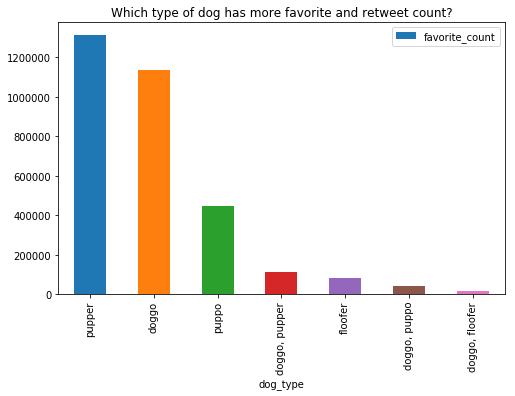

In [107]:
df3.plot(x="dog_type", y="favorite_count", kind="bar", title = "Which type of dog has more favorite and retweet count?", figsize = (8,5));

### Limitations

This project faced some limitations throughout the development, and they are: 
- The data is sufficient to prove all the questions, but it is necessary to eliminate almost 15% because of missing values and duplicates values. 
- Some columns were classified by the wrong type of data. 
- The column timestamp has a problem with writing, being necessary to fix.

<a id='conclusion'></a>
### Conclusion

To sum up, in this project we use the three steps of the Data Wrangling (Gather, Assess, and Clean). 

In the gather phase, we extract three differents data, one with "pd.read_csv", other with Twitter API, and the third with Request Library. 

In the Assess phase, we analyze visual and programmatic the dataframes, looking for missing and duplicates values, columns data types, and analyze the tidiness.

Finally, in the clean phase, we use the three steps of the Cleaning Data, that is: Define, Code, and Test.

After Data Wrangling, we merge all data frames and export to a csv file. Then, the data was analyze and we extract three insights and one visulization.